# DA 401 Final Project

## Author: Hung Tran
### The American Sign Language Analysis in Drive-through & Remote Customer Service Industry

In [35]:
import pandas as pd
import numpy as np
import json

#### **Webscrape Fastfood Text Data**

In [34]:
import requests
from bs4 import BeautifulSoup
import os

In [37]:
def scrape_text(url,save_path, brand_name):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    paragraphs = soup.find_all('p')
    folder_path = save_path
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    n=0    
    for paragraph in paragraphs:
        n+=1
        file_name = f'{brand_name}_{n}.txt'
        with open(os.path.join(folder_path, file_name), 'w') as file:
            file.write(paragraph.text)


#### **English Vocabulary Checking Bar**

In [38]:
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to
[nltk_data]     /users/PDNU0015/trann2/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [39]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     /users/PDNU0015/trann2/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [40]:
words = set(nltk.corpus.words.words())

#### **Fastfood Review Data Webscrapping**

In [5]:
#KFC
KFC_url = 'https://www.trustpilot.com/review/kfc.co.uk'
KFC_path = '/users/PDNU0015/trann2/DA401_ASL/data/kfc'
scrape_text(KFC_url, KFC_path, 'KFC')

In [6]:
#Dominos
dominos_url = 'https://www.trustpilot.com/review/www.dominos.co.uk'
dominos_path = '/users/PDNU0015/trann2/DA401_ASL/data/dominos'
scrape_text(dominos_url, dominos_path, 'Dominos')

In [8]:
#McDonalds
mcdonalds_url = 'https://www.trustpilot.com/review/www.mcdonalds.co.uk'
mcdonalds_path = '/users/PDNU0015/trann2/DA401_ASL/data/mcdonalds'
scrape_text(mcdonalds_url, mcdonalds_path, 'McDonalds')

In [41]:
path_food = 'data/fastfood/'
filelist = os.listdir(path_food)
list_food = []

for i in filelist:
    if i.endswith(".txt"):
        with open(path_food + i, 'r', encoding = 'utf-8') as file:
            data = file.read().replace('\n','')
            data = " ".join(w for w in nltk.wordpunct_tokenize(data) if w.lower() in words or not w.isalpha())
            data = lemmatizer.lemmatize(data)
    list_food.append(data)        

In [42]:
for i in list_food:
    if ' ' not in i:
        list_food.remove(i)
    if 'Date of experience' in i:
        list_food.remove(i)

list_food
food_review = ''
for i in list_food:
    food_review += ' '+i
    
food_review

' 4 % 2 - star 6 % 1 - star 74 % Most relevant Just tried for the first time since being back in the for 3 . to say the least ... it for delivery from our local 6miles away . came within 30min , but it was cold cold . pizza was limp , not much chicken . stuffed crust was not stuffed , left me very . hone down the pan ... two recent delivery \' s have cold ... staff don \' t care . Manager on phone is just rude won \' t be again . Looking at for like this company are going down down the toilet !! 1 . 5 They got it wrong ….. again . So about 3 in 4 from my local are wrong . When I contact customer service they don ’ t care , and that ’ s the central team . Last time they ’ t do anything as I ’ t think to photograph the mess they made of the order . This time I have although I doubt that will make any difference to the usual well below par customer experience team . When I eating my Domino \' s pizza I discovered 2 long in it , pretty disgusting ! Sent to head office as , they said they \

#### **Hotel Review Data Integration**

In [43]:
with open('data/space_summ.json') as file:
    data_hotel = json.load(file)

def get_hotel_review(data):
    list_review = []
    for i in range(len(data)):
        review = ''
        for j in data[i]['reviews'][0]['sentences']:
            j = " ".join(w for w in nltk.wordpunct_tokenize(j) if w.lower() in words or not w.isalpha())
            review += j
            review = lemmatizer.lemmatize(review)
        list_review.append(review)        
    return list_review

In [44]:
hotel_list = get_hotel_review(data_hotel)
hotel_list
hotel_review = ''
for i in hotel_list:
    hotel_review += ' '+i
hotel_review

' We stayed here on a lay over home from .It was great to have a comfortable bed and room on our final night of .The the pool which was warmer than the at the resort in which we could not believe as we were in !The staff was friendly and we the after a long flight when we were waiting to check inn .Just a nice touch !Shuttle was convenient and would definitely stay here again . Downtown is fine if you are a business traveler .Rate are cheap , but breakfast was not included and hotel $ 20 for breakfast buffet .I bit too much for the and the quality is mediocre at best .are spacious , but .Hotel could do with a refurbishment .Pool was dirty .Overall , it was for the money and acceptable while on a business trip , but if I stayed in the hotel for , it would be very disappointing . I stayed here for one night for a short business trip with in downtown .This was part of the Luxury Collection , but been many times before , I did not expect much .Turns out I was way wrong .This was probably o

#### **Pharmaceutical Clinics Data Integration**



In [45]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     /users/PDNU0015/trann2/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [46]:
with open('data/en_mimic-ud-train.txt','r', encoding = 'utf-8') as pharm:
    prescription = pharm.read().replace('\n','').lower()
    prescription = " ".join(w for w in nltk.wordpunct_tokenize(prescription) if w.lower() in words or not w.isalpha())
    prescription = lemmatizer.lemmatize(prescription)

In [49]:
prescription

'79 yo with significant for ( 20 %), , , cad and dementia who with septic shock and acute cholecystitis -> g - drain in on [** 6 - 9 **]. : alert and x3 , pleasant and [** month / year ( 2 ) **] with care . + mae noted . cough / gag intact . + noted ( l pupil not ). c / o discomfort in am which resolved spontaneously , currently pain or discomfort . : monitor v - paced with transient episode of a - flutter . tenuous with position change -> 250 bolus given x1 with improvement . remains off . via . resp : coarse throughout with diffuse and noted . remains on ra . sob or resp distress . on this shift in addition to / q6hr by . : soft and . + noted . liquid brown stool x4 ( heme -). mushroom catheter inserted . remains x . : intact and patent yellow urine with no sedimentation noted , ~ 10 - 35 / . skin : coccyx pink and intact , protective barrier cream applied . g drain exit site with amt bloody drainage at exit site , wash with 1 / 2 st hydrogen peroxide and applied , with 10 \' s steri

#### **The Analysis on 3 Word Corpora**

In [50]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_df= .95,
    min_df=1,
    stop_words = stopwords.words('english'),
    use_idf=True,
    norm='l2'
)


corpus_list = [food_review, hotel_review, prescription]

transformed_documents = vectorizer.fit_transform(corpus_list)

[nltk_data] Downloading package stopwords to
[nltk_data]     /users/PDNU0015/trann2/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
top_terms = [term for term, score in sorted(zip(vectorizer.get_feature_names(), transformed_documents.sum(axis=0).A1), key=lambda x: x[1], reverse=True)]
top_terms_score = [score for term, score in sorted(zip(vectorizer.get_feature_names(), transformed_documents.sum(axis=0).A1),key=lambda x: x[1], reverse=True)]

/users/PDNU0015/trann2/.conda/envs/asl3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [52]:
top21 = top_terms[:21]
top_score_21 = top_terms_score[:21]

In [53]:
rank_ls =[]
for i in range(1,22):
    rank_name = f'Rank {i}'
    rank_ls.append(rank_name)


value = [rank_ls, top21]
column_name = ['Rank','Word']
dict_term = {k:v for (k,v) in zip(column_name, value)}
pd_term = pd.DataFrame(dict_term)
pd_term["score"] = top_score_21
pd_term

,Rank,Word,score
0,Rank 1,hotel,0.627154
1,Rank 2,room,0.525545
2,Rank 3,chicken,0.335813
3,Rank 4,pizza,0.335813
4,Rank 5,delivery,0.300384
5,Rank 6,ordered,0.246810
6,Rank 7,restaurant,0.237874
7,Rank 8,stay,0.224249
8,Rank 9,star,0.224121
9,Rank 10,right,0.219714


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[Text(0, 0, '0.627'),
 Text(0, 0, '0.526'),
 Text(0, 0, '0.336'),
 Text(0, 0, '0.336'),
 Text(0, 0, '0.3'),
 Text(0, 0, '0.247'),
 Text(0, 0, '0.238'),
 Text(0, 0, '0.224'),
 Text(0, 0, '0.224'),
 Text(0, 0, '0.22'),
 Text(0, 0, '0.209'),
 Text(0, 0, '0.208'),
 Text(0, 0, '0.187'),
 Text(0, 0, '0.187'),
 Text(0, 0, '0.179'),
 Text(0, 0, '0.178'),
 Text(0, 0, '0.175'),
 Text(0, 0, '0.173'),
 Text(0, 0, '0.16'),
 Text(0, 0, '0.156'),
 Text(0, 0, '0.144')]

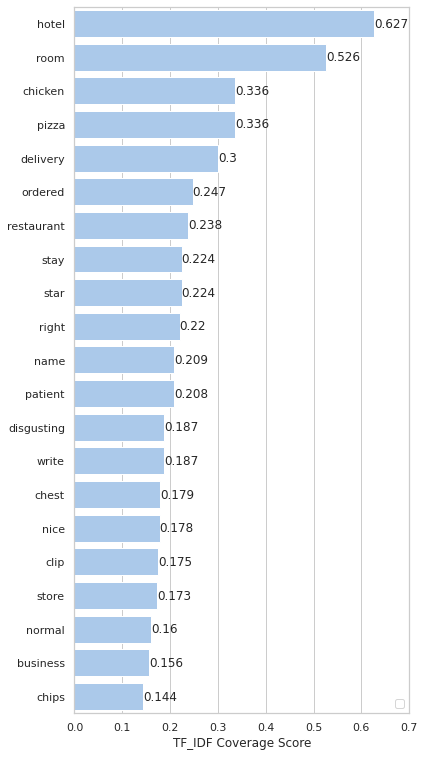

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6,13 ))


# Plot the total scores
sns.set_color_codes("pastel")
sns.barplot(x= round(pd_term['score'],3), y= pd_term['Word'], color="b")



# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, .7), ylabel="",
       xlabel="TF_IDF Coverage Score")

ax.bar_label(ax.containers[0])

In [57]:
import random as rnd


In [58]:
list_data = []
for i in range(22):
    rnd_num = rnd.randint(0,1)
    list_data.append(rnd_num)
    
list_data

[1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0]

In [59]:
result_list = np.random.choice([0, 1], size=21, p=[1 - .4221, .4221])
result_list

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0])

In [67]:
dfs1

,Participant,Model,value
0,Person 1,I3D,0.379231
1,Person 2,I3D,0.400322
2,Person 3,I3D,0.274627
3,Person 4,I3D,0.358895
4,Person 1,TGCN,0.310030
5,Person 2,TGCN,0.373678
6,Person 3,TGCN,0.206571
7,Person 4,TGCN,0.248725


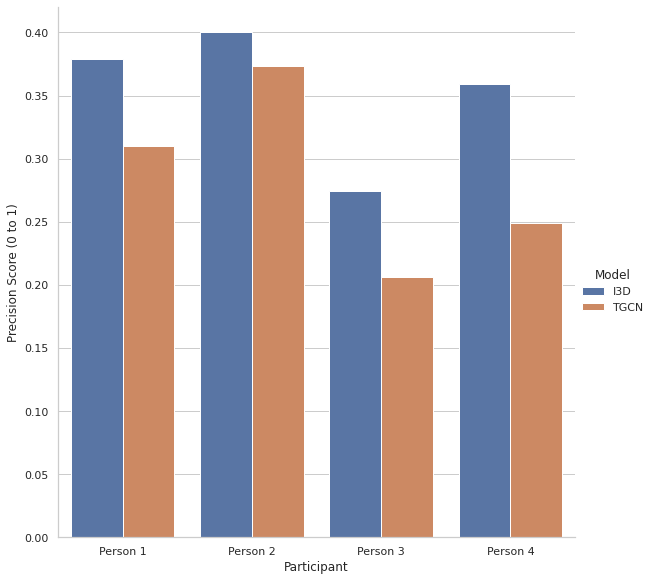

In [83]:
precision_score_i3d = [0.379231, 0.400322, 0.274627, 0.358895]
precision_score_tgcn = [0.31003, 0.373678, 0.206571, 0.248725]
precision_person = ['Person 1','Person 2', 'Person 3', 'Person 4']

data = {"Participant":precision_person, "I3D": precision_score_i3d, "TGCN": precision_score_tgcn}
df = pd.DataFrame(data)

dfs1 = pd.melt(df, id_vars = "Participant")
dfs1 = dfs1.rename(columns={"variable": "Model", 'value':'Precision Score'})


sns.catplot(x = 'Participant', y='Precision Score', hue = 'Model',data=dfs1, kind='bar', height=8)
plt.ylabel('Precision Score (0 to 1)')

plt.show()


In [ ]:
actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()